#Unidade 1

In [1]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from scipy.stats import mannwhitneyu

In [2]:
#lendo os dados
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv")

In [3]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [4]:
df.shape

(17429, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [7]:
#o ideal e mais interessante nesse caso de substituição do "nan" é usar interpolate
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [8]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [9]:
df.duplicated().sum()

15

In [10]:
duplicatas = df.duplicated(keep=False)

linhas_duplicadas = df[duplicatas]

linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [11]:
linhas_duplicadas

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
5360,2015-08-15 23:00:00,759,17.0,17.0,59.0,6.0,Céu limpo,Não,Sim,Verão
8174,2015-12-12 11:00:00,1100,12.0,12.0,82.0,20.0,Chuva leve,Não,Sim,Inverno
8175,2015-12-12 12:00:00,1308,13.0,13.0,77.0,26.0,Chuva leve,Não,Sim,Inverno
8528,2015-12-27 05:00:00,57,15.0,15.0,72.0,31.0,Parcialmente nublado,Não,Sim,Inverno
9428,2016-02-02 17:00:00,2846,8.0,4.5,59.5,23.0,Parcialmente nublado,Não,Não,Inverno


In [12]:
df_limpo = df.drop_duplicates()

In [13]:
df_limpo.duplicated().sum()

0

In [14]:
df_limpo.shape

(17414, 10)

#Unidade 2

In [15]:
df_limpo.describe().round(2)

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.00,17414.00,17414.00,17414.00,17414.00
mean,1143.10,12.47,11.52,72.32,15.91
std,1085.11,5.57,6.61,14.31,7.89
min,0.00,-1.50,-6.00,20.50,0.00
25%,257.00,8.00,6.00,63.00,10.00
50%,844.00,12.50,12.50,74.50,15.00
75%,1671.75,16.00,16.00,83.00,20.50
max,7860.00,34.00,34.00,100.00,56.50


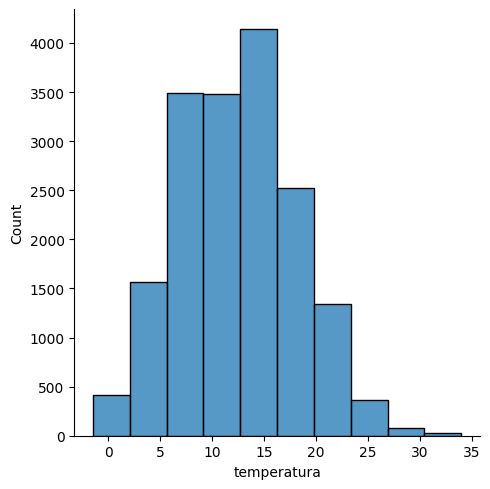

In [16]:
sns.displot(df_limpo, x='temperatura', bins=10)
plt.show()

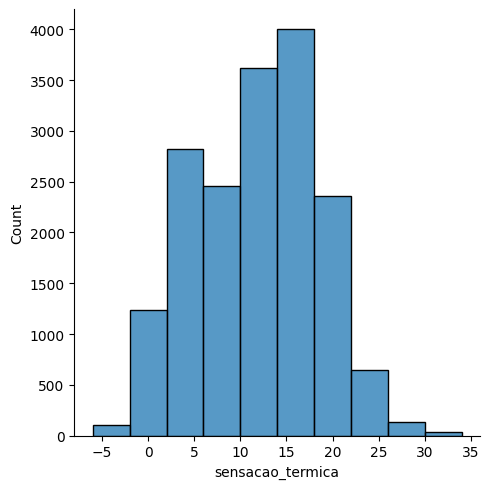

In [17]:
sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.show()

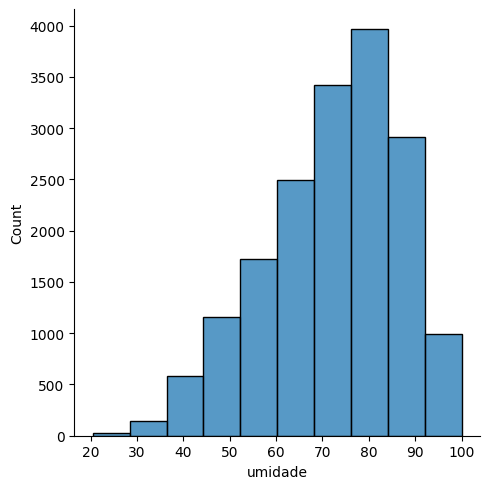

In [18]:
sns.displot(df_limpo, x='umidade', bins=10)
plt.show()

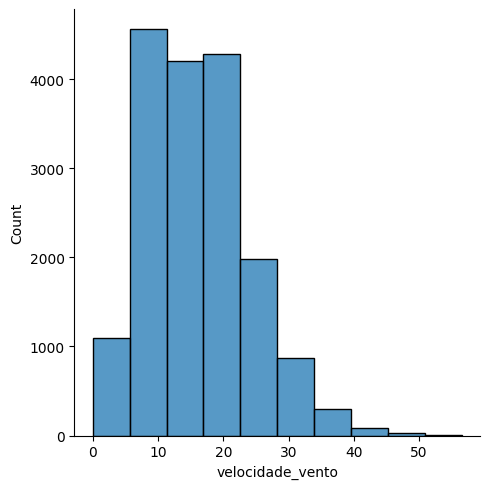

In [19]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.show()

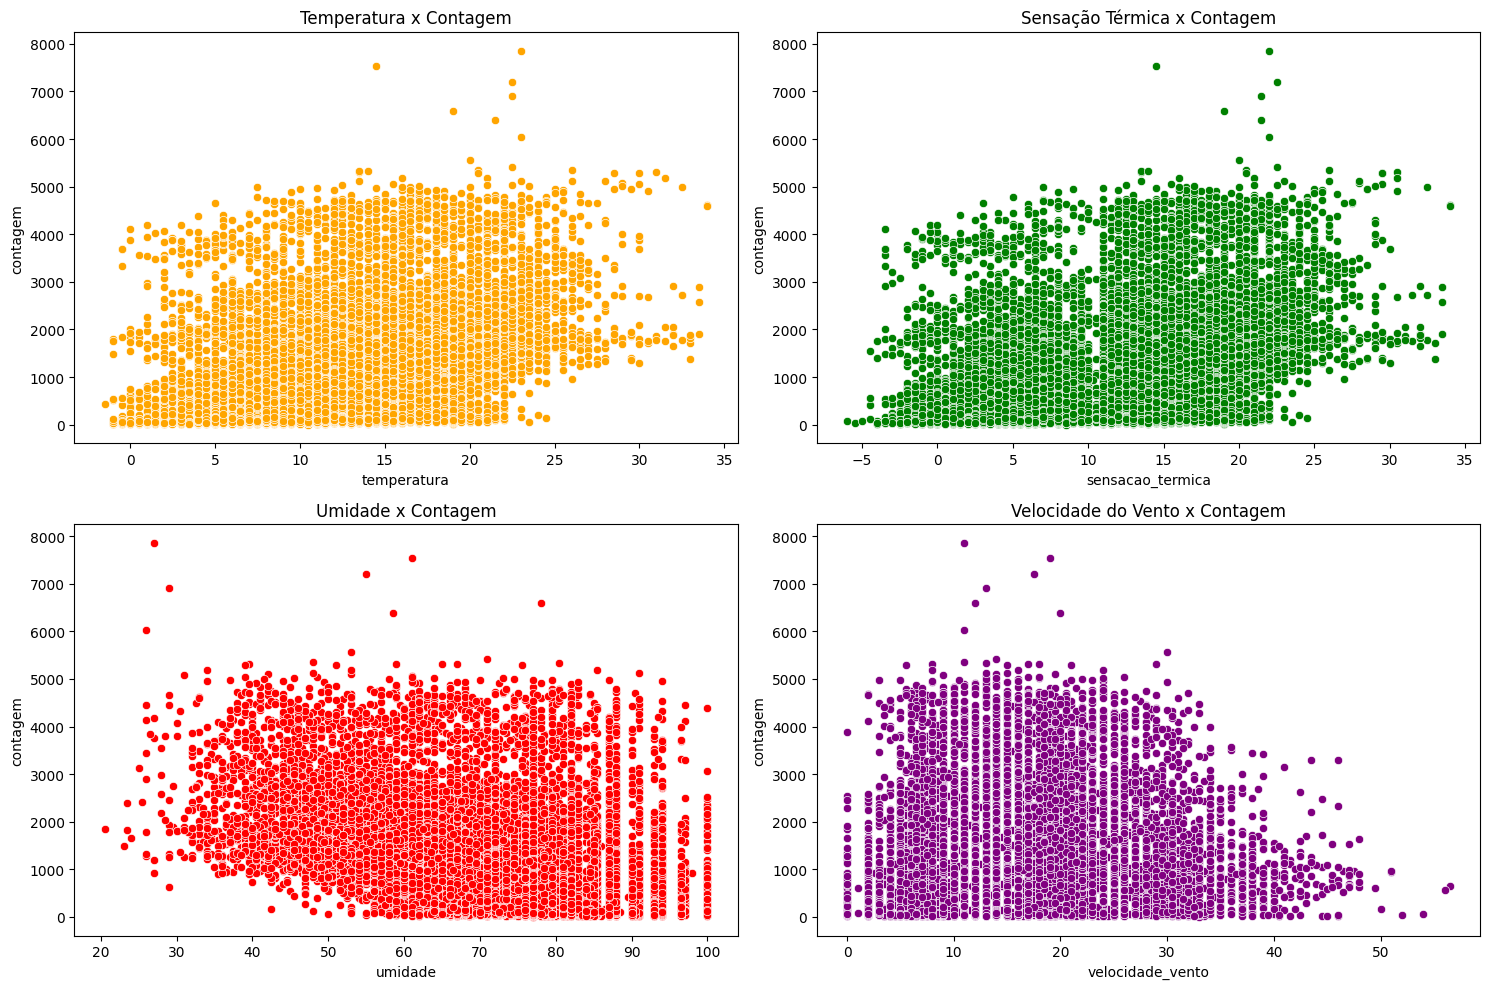

In [20]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

#1
sns.scatterplot(ax=axes[0,0], data=df_limpo, x='temperatura', y='contagem', color='orange' )
axes[0,0].set_title('Temperatura x Contagem')

#2
sns.scatterplot(ax=axes[0,1], data=df_limpo, x='sensacao_termica', y='contagem', color='green')
axes[0,1].set_title('Sensação Térmica x Contagem')

#3
sns.scatterplot(ax=axes[1,0],data=df_limpo, x='umidade', y='contagem', color='red')
axes[1,0].set_title('Umidade x Contagem')

#4

sns.scatterplot(ax=axes[1,1], data=df_limpo, x='velocidade_vento', y='contagem', color='purple')
axes[1,1].set_title('Velocidade do Vento x Contagem')

plt.tight_layout()
plt.show()

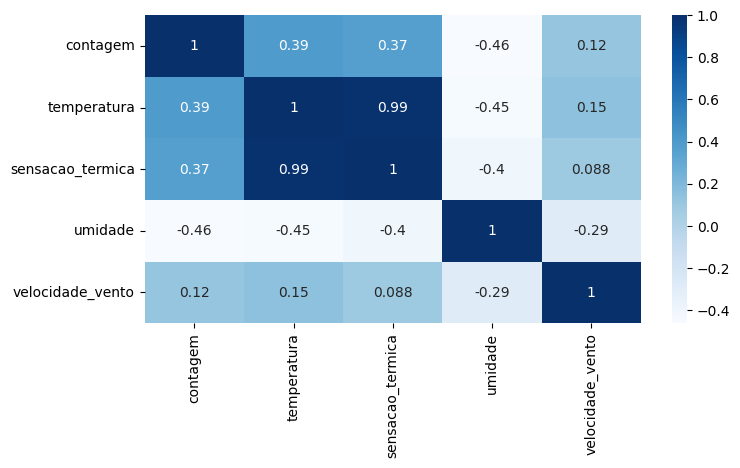

In [21]:
plt.figure(figsize=(8,4))
                                                #valor da correlacao na imagem
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues');
plt.show()

#Unidade 3

In [22]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [23]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna {col}:\n')
  print(df_limpo[col].unique())
  print('\n============================================\n')

Coluna clima:

['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']


Coluna feriado:

['Não' 'Sim']


Coluna fim_de_semana:

['Sim' 'Não']


Coluna estacao:

['Inverno' 'Primavera' 'Verão' 'Outono']




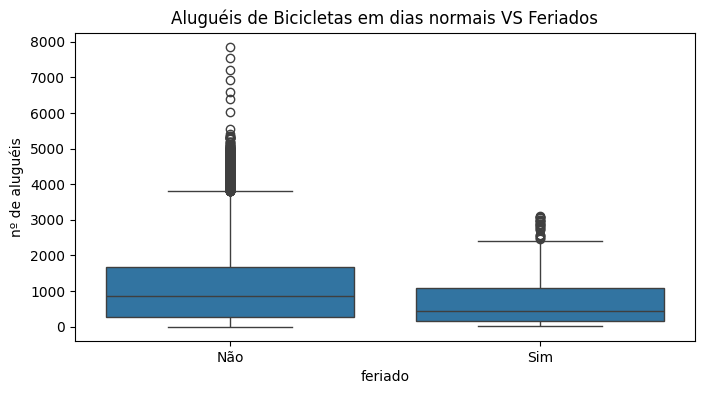

In [24]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_limpo, x='feriado', y='contagem')
plt.title('Aluguéis de Bicicletas em dias normais VS Feriados')
plt.xlabel('feriado')
plt.ylabel('nº de aluguéis')
plt.show()

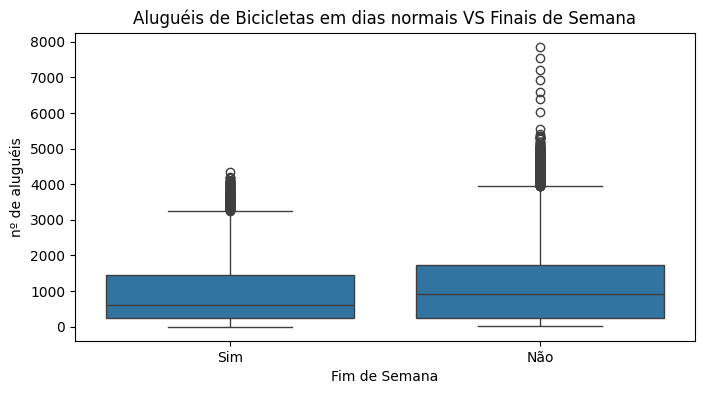

In [25]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_limpo, x='fim_de_semana', y='contagem')
plt.title('Aluguéis de Bicicletas em dias normais VS Finais de Semana')
plt.xlabel('Fim de Semana')
plt.ylabel('nº de aluguéis')
plt.show()

In [26]:
 mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
 mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [27]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [28]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


In [29]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
df_clima.reset_index(drop=True, inplace=True)


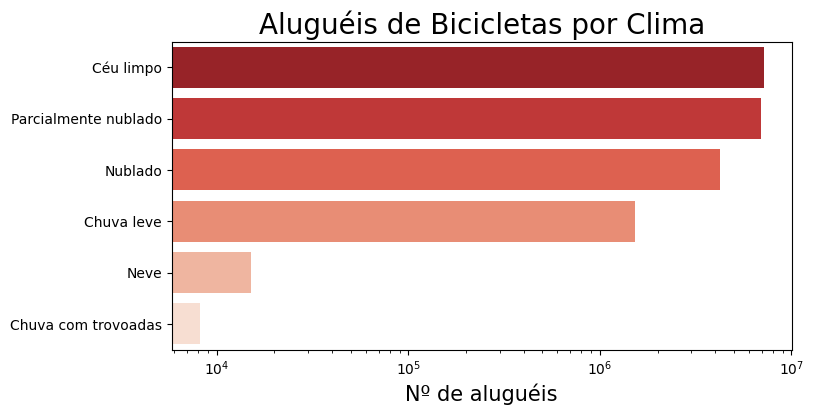

In [30]:
plt.figure(figsize=(8,4))

sns.barplot(x='contagem', y='clima', data=df_clima, hue='clima', palette='Reds_r', orient='h')
plt.title('Aluguéis de Bicicletas por Clima', fontsize=20)
plt.xscale('log')
plt.xlabel('Nº de aluguéis', fontsize=15)
plt.ylabel('')
plt.show()

In [31]:
df_clima

,clima,contagem
0,Céu limpo,7146847
1,Parcialmente nublado,6965558
2,Nublado,4243887
3,Chuva leve,1526461
4,Neve,15051
5,Chuva com trovoadas,8168


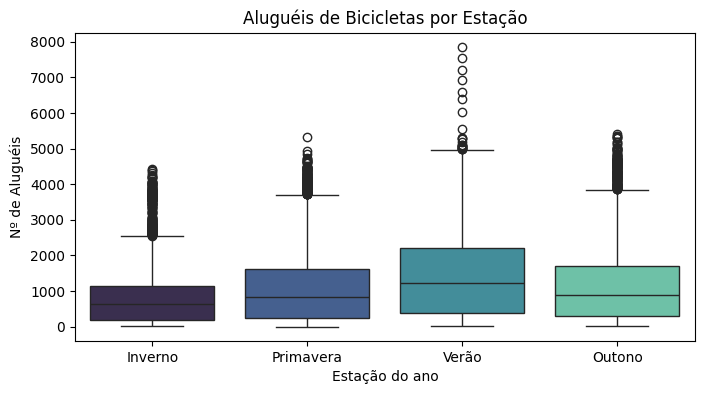

In [32]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_limpo, x='estacao', y='contagem', hue='estacao', palette='mako');
plt.xlabel('Estação do ano')
plt.ylabel('Nº de Aluguéis')
plt.title('Aluguéis de Bicicletas por Estação')

plt.show()

In [33]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [34]:
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

In [35]:
'''
H0 = distribuição são iguais
H1 = distribuição são diferentes
'''
stats_u, p_valor = mannwhitneyu(primavera, outono, alternative='two-sided')


In [36]:
if p_valor < 0.05:
  print(p_valor)
  print('Rejeita-se a hipótese nula')
else:
  print('Não rejeita-se a hipótese nula')

0.0004762100221646296
Rejeita-se a hipótese nula


In [37]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [38]:
df_data = df_limpo.copy()

In [39]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [41]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [42]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [43]:
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [44]:
df_data = df_data.rename(columns={'data_hora':'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [45]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [46]:
df_data['data']= pd.to_datetime(df_data['data'])

In [47]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


In [48]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()
df_por_hora.head()

,horario,contagem
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859


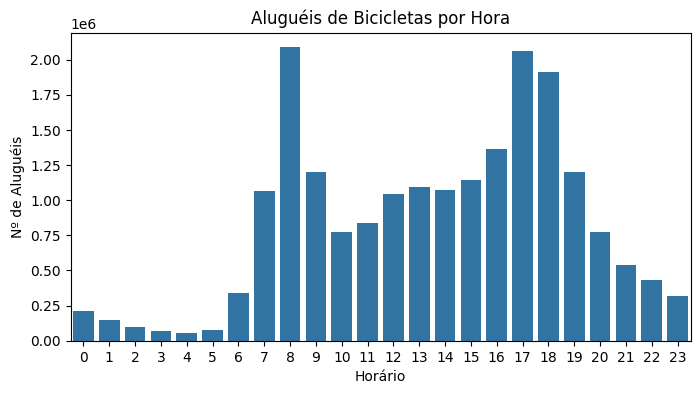

In [49]:
plt.figure(figsize=(8,4))

sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Aluguéis de Bicicletas por Hora')
plt.xlabel('Horário')

plt.ylabel('Nº de Aluguéis')
plt.show()

In [50]:
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()
alugueis_fim_de_semana

,horario,contagem
0,0,98841
1,1,78952
2,2,56394
3,3,40474
4,4,25899
5,5,19937
6,6,24955
7,7,44129
8,8,85652
9,9,162990


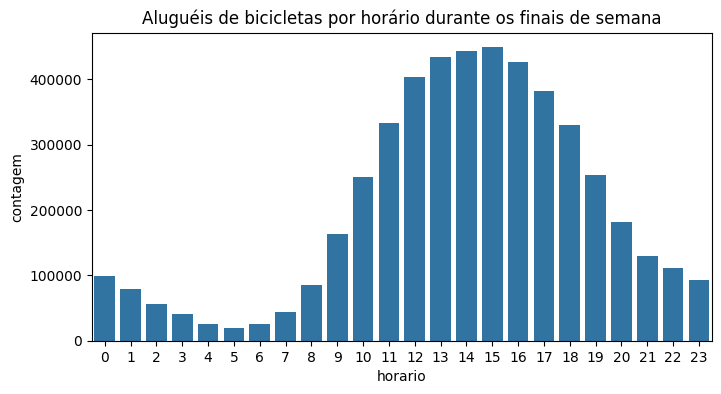

In [51]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.show()


In [52]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
df_tempo.head()

,data,contagem
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


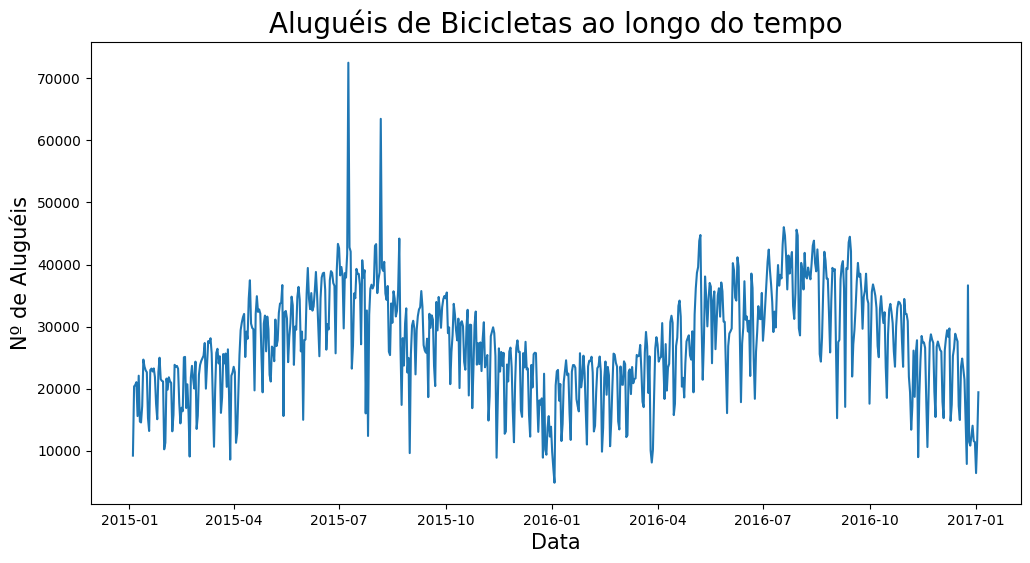

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')

plt.title('Aluguéis de Bicicletas ao longo do tempo', fontsize=20)
plt.xlabel('Data',fontsize=15)
plt.ylabel('Nº de Aluguéis',fontsize=15)
plt.show()

In [54]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()
alugueis_mensais

,mes,contagem
0,1,1166837
1,2,1136504
2,3,1352461
3,4,1600427
4,5,1897348
5,6,1967130
6,7,2286214
7,8,2171265
8,9,1891097
9,10,1800752


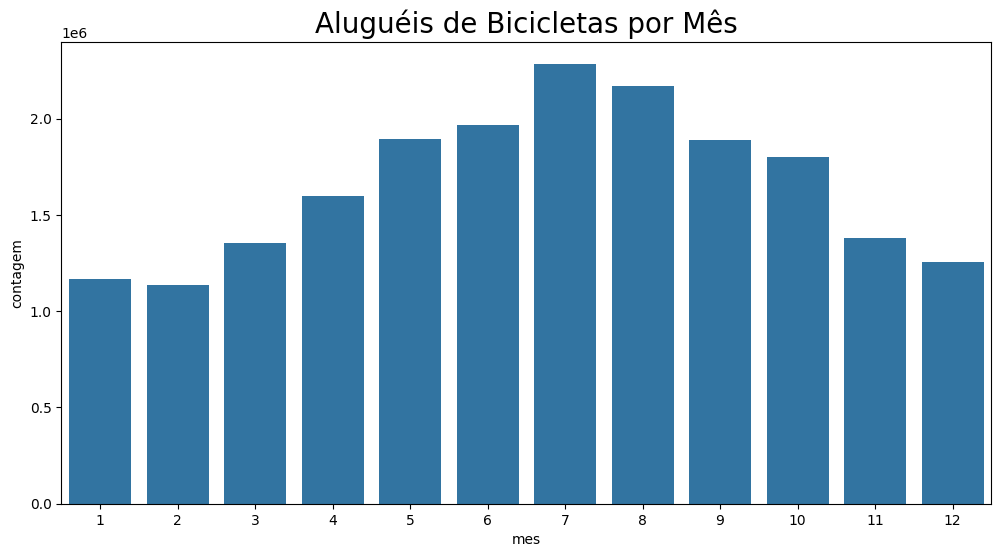

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de Bicicletas por Mês', fontsize=20)
plt.show()

Observando o gráfico, concluímos que os meses de janeiro e fevereiro têm os números de aluguel mais baixos. Eles vão aumentando ao longo do ano, subindo gradativamente até chegar em julho, o mês com o maior número de bicicletas alugadas. Também temos alta quantidade de bicicletas alugadas em agosto. A partir de setembro, esse número cai gradativamente até dezembro.

Isso é exatamente o que intuímos no gráfico de linhas: há um padrão que se repete de um ano para o outro. Esse tipo de padrão se chama sazonalidade!

Isso pode estar ligado, por exemplo, às estações do ano. Quando analisamos os dados pelas estações, concluímos que o verão era a estação com a maior quantidade de bicicletas alugadas, o que se confere com o gráfico que plotamos agora. Na Europa, o verão é no meio do ano, ao contrário do Brasil.
Conclusão

Conseguimos observar a sazonalidade e entender o que é uma série temporal. Agora chegou a parte mais legal de trabalhar com esses dados:

    E se quisermos prever dados futuros? Quantas bicicletas vão ser alugadas amanhã? E depois de amanhã? E no mês que vem?


#Unidade 5

In [56]:
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet.head()
'''
recisamos renomear essas colunas, pois o Prophet
 reconhece a data como ds e a contagem como y.
'''

'\nrecisamos renomear essas colunas, pois o Prophet\n reconhece a data como ds e a contagem como y.\n'

In [57]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [58]:
np.random.seed(4587)


In [59]:
modelo = Prophet()

modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/g8o3drbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/t0syjl9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11337', 'data', 'file=/tmp/tmpq108pm_a/g8o3drbp.json', 'init=/tmp/tmpq108pm_a/t0syjl9m.json', 'output', 'file=/tmp/tmpq108pm_a/prophet_modelm1hl2for/prophet_model-20250110150600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Podemos visualizar esses resultados de uma forma interessante usando uma biblioteca que gera gráficos. Para isso, vamos criar uma variável para armazenar essa figura, chamando-a de fig1. Usaremos o método .plot() passando nossa previsão como argumento.

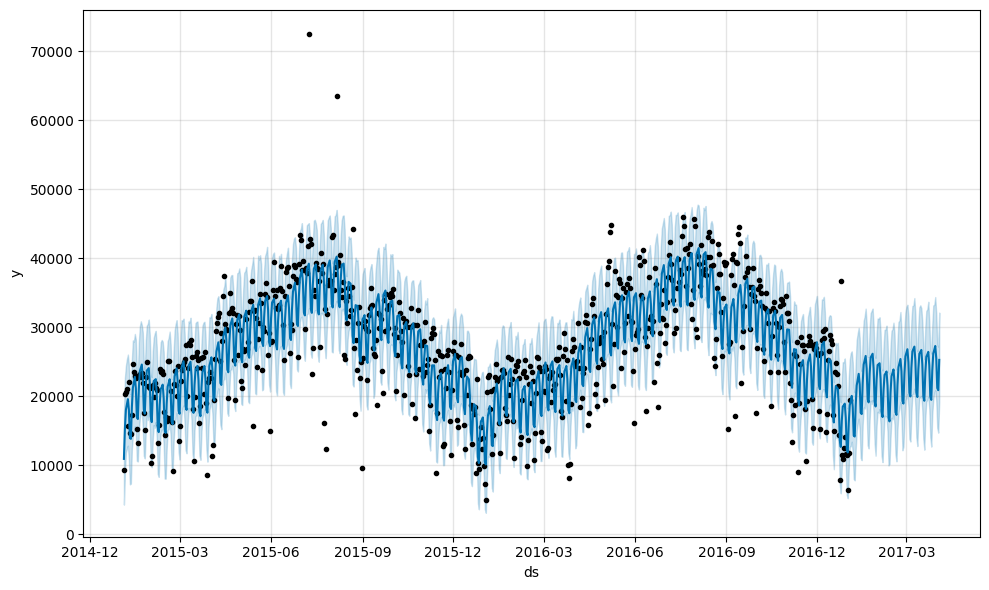

In [60]:
fig1 = modelo.plot(previsao)

À primeira vista, o gráfico pode parecer um pouco confuso, mas vamos entendê-lo juntos. Lembra do gráfico de linhas que criamos na aula anterior, representando as datas e a contagem de bicicletas? Aqui, temos algo semelhante. No eixo x, temos as datas, e no eixo y, a contagem de bicicletas.

A linha azul escura que percorre todo o período representa nossa previsão, os valores que o Prophet está prevendo. No gráfico, também vemos vários pontos pretos ao longo da linha. Esses pontos pretos são nossos valores reais de y, os valores que tínhamos no dataframe para cada dia.

Além disso, há uma faixa azul mais clara envolvendo a linha de previsão. Essa faixa é o nosso intervalo de confiança. É importante que os pontos pretos, nossos valores reais de y, estejam dentro desse intervalo de confiança.

Alguns pontos estão fora desse intervalo, e podemos visualizar isso. Esses pontos altos, que já tínhamos visto na aula anterior, são valores muito discrepantes que não foram previstos pelo modelo, pois são extremos.

Mas aqui está a questão: há um período, começando em 2017, em que não temos nenhum ponto preto. Por quê? Porque definimos um período de 90 dias para a previsão. Assim, os valores após essa linha azul são novos valores previstos pelo modelo com base nos dados anteriores.

Então, de onde vieram esses valores? Podemos descobrir isso e também editar essa figura. Ao verificar o DataFrame de previsão, teremos os valores previstos.

Vamos verificar essas informações? Digitaremos previsao[['ds', 'yhat']]. Aqui, 'ds' representa a coluna das datas, e 'yhat' representa os valores previstos. O nome 'yhat' vem do símbolo matemático para previsão, onde o chapéu representa a estimativa. Em inglês, "hat" significa chapéu. Além disso, vamos exibir o yhat_lower e o yhat_upper.

In [61]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


No DataFrame, temos a coluna 'ds', que representa as datas, incluindo as datas futuras. Temos também 'yhat', que é o valor calculado pelo modelo como a contagem de bicicletas para cada dia. Além disso, temos 'yhat_lower', que é o limite inferior do intervalo de confiança, e 'yhat_upper', que é o limite superior do intervalo de confiança. Esses valores nos ajudam a construir o gráfico e entender como a previsão está sendo feita.

Mas como o Prophet faz essa previsão? Que tipo de modelo ele usa? O Prophet é um modelo de regressão aditivo que adiciona diferentes componentes para fazer a previsão final. Quais são esses componentes? Podemos imprimir esses componentes para entender melhor.
Interpretação dos gráficos de componentes diferentes

Vamos agora fazer a figura 2, chamando-a de fig2, e usaremos .plot_components(), passando previsao como argumento.

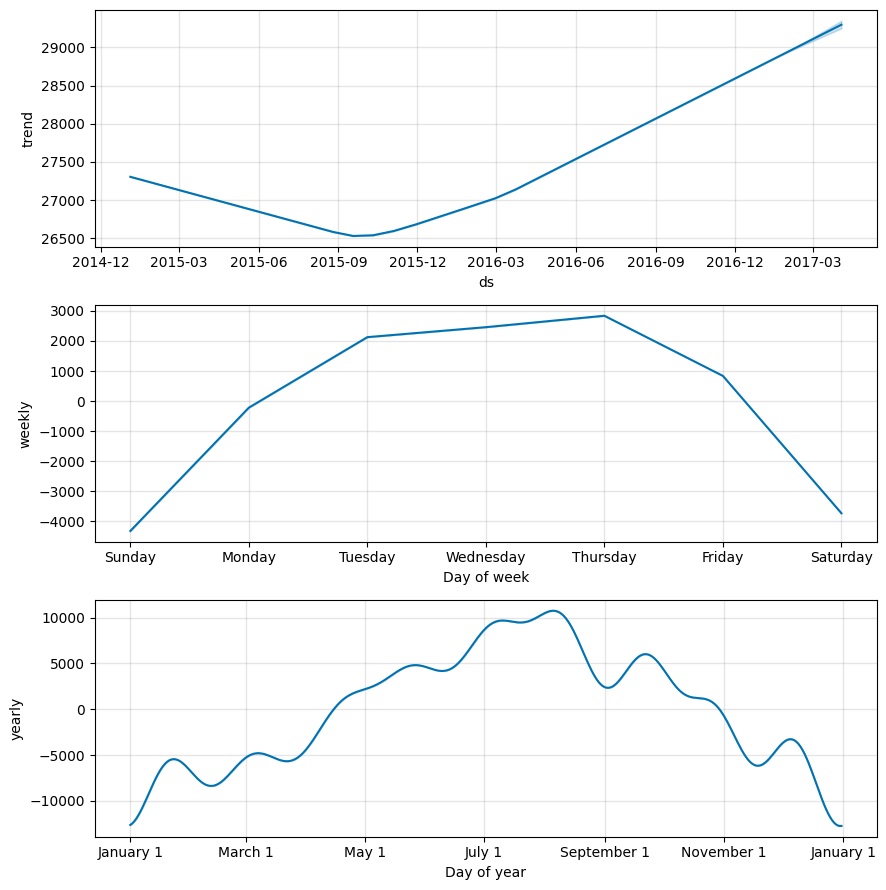

In [62]:
fig2 = modelo.plot_components(previsao)

Ao executar, veremos três gráficos em uma mesma imagem. Cada gráfico representa um componente diferente que o Prophet utilizou para fazer a previsão.

O primeiro componente é a tendência. Ele indica se a previsão está aumentando ou diminuindo. Aqui, indica que a previsão está subindo.

Também temos dois componentes relacionados à sazonalidade, como discutimos na aula anterior. Um desses componentes é semanal, e podemos observar como os aluguéis diminuem nos finais de semana. O gráfico mostra os valores para cada dia da semana, onde vemos que os aluguéis são mais baixos aos domingos, aumentam na segunda e terça-feira, permanecem estáveis entre quarta e quinta-feira, e diminuem novamente de quinta para sexta-feira e de sexta para sábado.

Outro componente considerado para a previsão é o anual. Podemos ver que os aluguéis são mais baixos em janeiro, aumentam gradualmente até o meio do ano, alcançando o pico, e então diminuem novamente até o final do ano.
Próximos passos

Esses componentes foram utilizados para fazer a previsão dos aluguéis de bicicletas. No entanto, é importante notar que fizemos essa previsão utilizando todo o conjunto de dados.

Em modelos de Machine Learning, é recomendável separar os dados em conjuntos de treinamento e teste. Vamos fazer isso no próximo vídeo, treinando o modelo com parte dos dados para que ele possa entender padrões e depois testá-lo com dados que ele não viu antes. Aguardem o próximo vídeo, onde faremos essa separação e entenderemos como o modelo lida com isso.

In [63]:
df_prophet.shape

(730, 2)

In [64]:
df_train = pd.DataFrame()

df_train['ds'] = df_prophet['ds'].iloc[:584]
df_train['y'] = df_prophet['y'].iloc[:584]

In [65]:
df_test = pd.DataFrame()

df_test['ds'] = df_prophet['ds'].iloc[584:]
df_test['y'] = df_prophet['y'].iloc[584:]

In [66]:
np.random.seed(4587)
modelo = Prophet()
modelo.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/f1blxqg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/61q7_rdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10322', 'data', 'file=/tmp/tmpq108pm_a/f1blxqg3.json', 'init=/tmp/tmpq108pm_a/61q7_rdp.json', 'output', 'file=/tmp/tmpq108pm_a/prophet_modeld3vkx_1t/prophet_model-20250110150602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

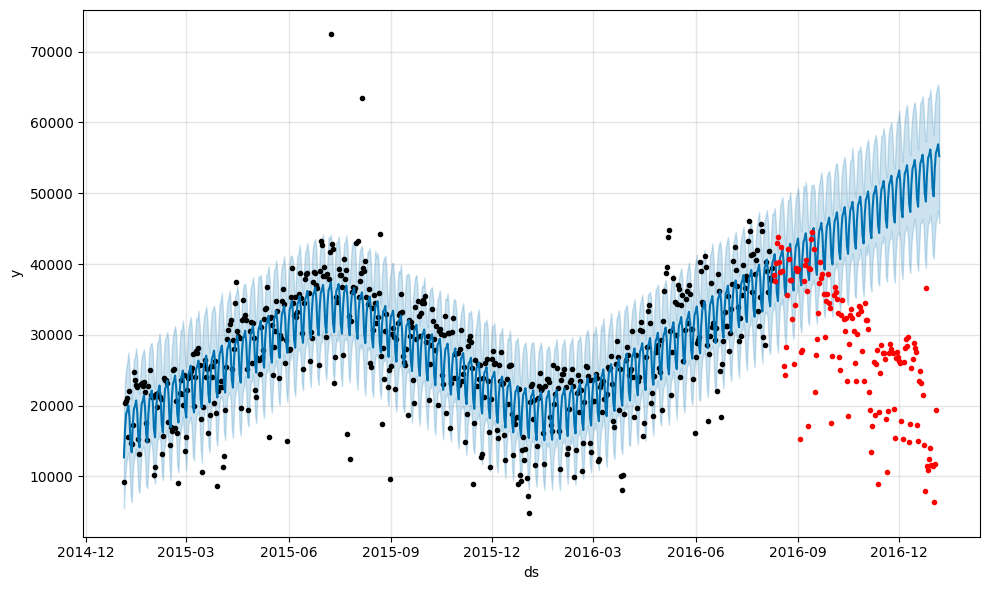

In [68]:
fig1 = modelo.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')

Isso indica que o modelo não conseguiu capturar corretamente o padrão dos dados de teste. Observamos que, ao rodar o modelo, ele desabilitou a sazonalidade anual, indicando que não conseguiu identificar o padrão sazonal anual nos dados, resultando em uma previsão inadequada.

Se verificarmos os componentes da previsão, podemos entender melhor o que ocorreu. Vamos criar uma nova figura, fig2, para visualizar esses componentes utilizando o método .plot_components() e passando previsao como argumento.

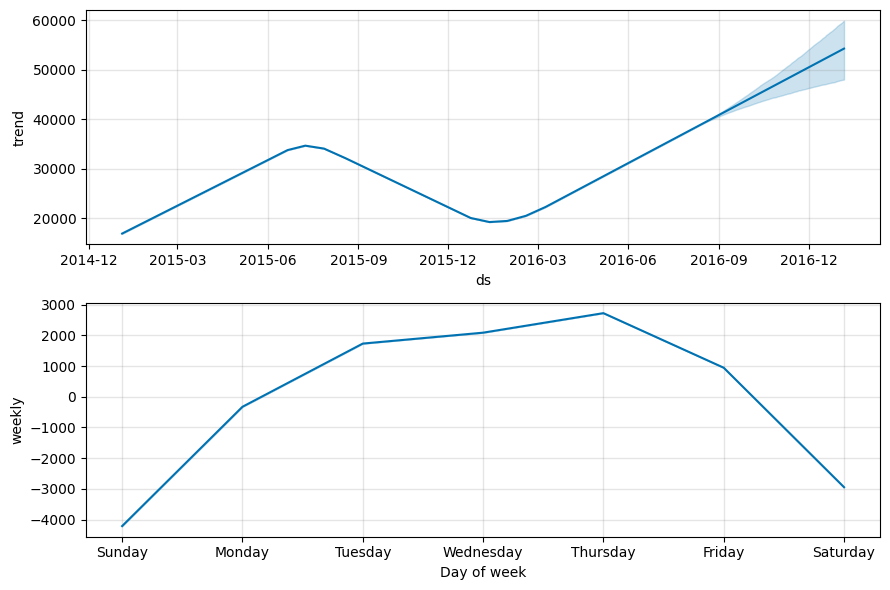

In [69]:
fig2 = modelo.plot_components(previsao)

Primeiro, vemos que a tendência está subindo, quando, na verdade, deveria estar descendo conforme os dados de teste indicam. Isso mostra que o modelo não conseguiu capturar corretamente a tendência dos dados.

Além disso, notamos que a sazonalidade anual não está sendo considerada, apenas a sazonalidade semanal. Isso ocorreu porque, quando rodamos o modelo, ele desabilitou a sazonalidade anual, conforme indicado na primeira linha da saída do modelo. Essa desativação da sazonalidade anual resultou em uma previsão inadequada.
Próximos passos

Agora, precisamos avaliar quão ruim está a performance do modelo. Para isso, utilizaremos uma métrica adequada que nos permita quantificar o erro.

No próximo vídeo, exploraremos essa métrica para entender melhor a performance do modelo e quantificar o erro nas previsões.

In [70]:
df_previsao = previsao[['ds', 'yhat']]

df_comparacao = pd.merge(df_previsao, df_test, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


Agora, precisamos entender quão ruim está a performance do modelo. Para isso, utilizaremos uma métrica apropriada.

Quando trabalhamos com regressão linear, costumamos usar a métrica R² para avaliar a performance do modelo. Essa métrica é adequada para relações lineares.

No entanto, em séries temporais, não temos uma relação linear simples, já que os valores podem subir e descer devido a vários fatores, como sazonalidade. Portanto, a métrica R² não é a melhor escolha aqui.

A ideia é usar uma métrica adequada para séries temporais, que compare os valores previstos com os valores reais e forneça uma estimativa de quão precisas são as previsões. Queremos saber se estamos errando, em média, tantas bicicletas para cima ou para baixo.
Criação de um DataFrame de comparação

Para fazer isso, vamos criar um DataFrame que contenha as datas, os valores reais e os valores previstos. Com esse DataFrame, poderemos calcular uma métrica adequada para avaliar a precisão do modelo. Vamos começar criando esse DataFrame, focando apenas nos dados de teste.

Agora, vamos unir os dados de previsão ao nosso DataFrame de teste e comparar com os valores reais de y. Primeiro, criaremos um DataFrame chamado df_comparacao, onde uniremos df_previsao com df_teste. Para fazer isso, usaremos a função .merge(), da biblioteca Pandas, que permite unir DataFrames com base em uma coluna comum. A coluna comum entre eles é ds, que representa as datas.

Observando os dados, notamos que, na primeira data do período de teste, 10 de agosto de 2016, o valor real de y foi 38.430 bicicletas, enquanto a previsão (yhat) foi de 40.646 bicicletas. A previsão foi relativamente próxima do valor real.

No entanto, para outras datas, especialmente mais para o final, os valores previstos estão bastante distantes dos valores reais. Por exemplo, em 30 de dezembro de 2016, o valor real foi de 11.500 bicicletas, mas a previsão foi de 54.505 bicicletas, uma diferença enorme.

##Quantificação dos erros
###Fórmula do Erro Quadrático Médio (MSE)

Para quantificar esses erros, precisamos de uma métrica que compare os valores reais (y) com os valores previstos (yhat) e calcule uma média do erro. Uma métrica adequada para isso é o Erro Quadrático Médio (MSE), que nos dá uma noção clara de quanto o modelo está errando em média.

Fórmula do Erro Quadrático Médio (MSE) expressa como MSE igual a soma, de índice i, da diferença entre y subscrito i e y com um acento circunflexo subscrito i ao quadrado, tudo isso dividido por n.

Essa métrica pega a diferença entre os valores reais (y) e previstos (yhat), subtraindo-os. Em seguida, eleva essa diferença ao quadrado, soma todos esses valores e depois divide pelo número de observações (n), que é o número de linhas do nosso DataFrame (146). Isso penaliza erros maiores devido à elevação ao quadrado.
Cálculo do RMSE

Para obter um valor mais compreensível, tiramos a raiz quadrada do MSE, resultando na métrica Raiz do Erro Quadrático Médio (RMSE).

Vamos calcular essas métricas usando a biblioteca SKLearn. Primeiro, importamos a função mean_squared_error.

from sklearn.metrics import mean_squared_error

Agora, vamos calcular o MSE. Primeiro, definiremos o mse como a função mean_squared_error() e passamos os valores de y e yhat do df_comparacao. A função fará a subtração, elevará ao quadrado, somará os resultados e calculará a média.


Com isso, obteremos o MSE. No entanto, como mencionado, precisamos calcular a raiz quadrada do MSE para obter o RMSE. Para isso, definiremos rmse usando a função sqrt(), da biblioteca NumPy, passando o mse como parâmetro.

Finalmente, exibiremos os resultados dessas métricas utilizando uma f-string para formatar a saída de forma estruturada, incluindo tanto o MSE quanto o RMSE.

In [71]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:466132050.6184666, RMSE:21590.09149166503


Note que o MSE resultou em um valor muito alto, como esperado, devido à elevação ao quadrado das diferenças. No entanto, o RMSE é mais compreensível e, neste caso, foi de 21.590. Isso significa que nosso modelo está errando, em média, 21.590 bicicletas por dia, o que é um erro bastante significativo.
Próximos passos

Agora que entendemos como calcular e interpretar essas métricas, nosso próximo passo é tentar melhorar o modelo. Na próxima aula, faremos ajustes para aprimorar a precisão das previsões.

#Unidade 6

In [72]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_train)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/j2entold.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/rvi655jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39024', 'data', 'file=/tmp/tmpq108pm_a/j2entold.json', 'init=/tmp/tmpq108pm_a/rvi655jj.json', 'output', 'file=/tmp/tmpq108pm_a/prophet_modelblmve9v_/prophet_model-20250110150604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


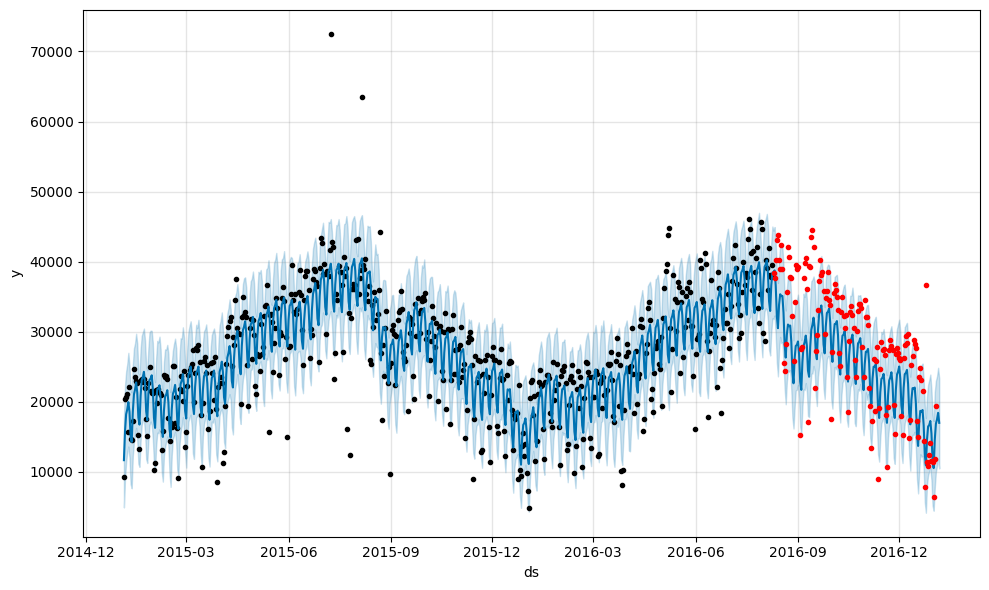

In [73]:
fig1 = modelo.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')

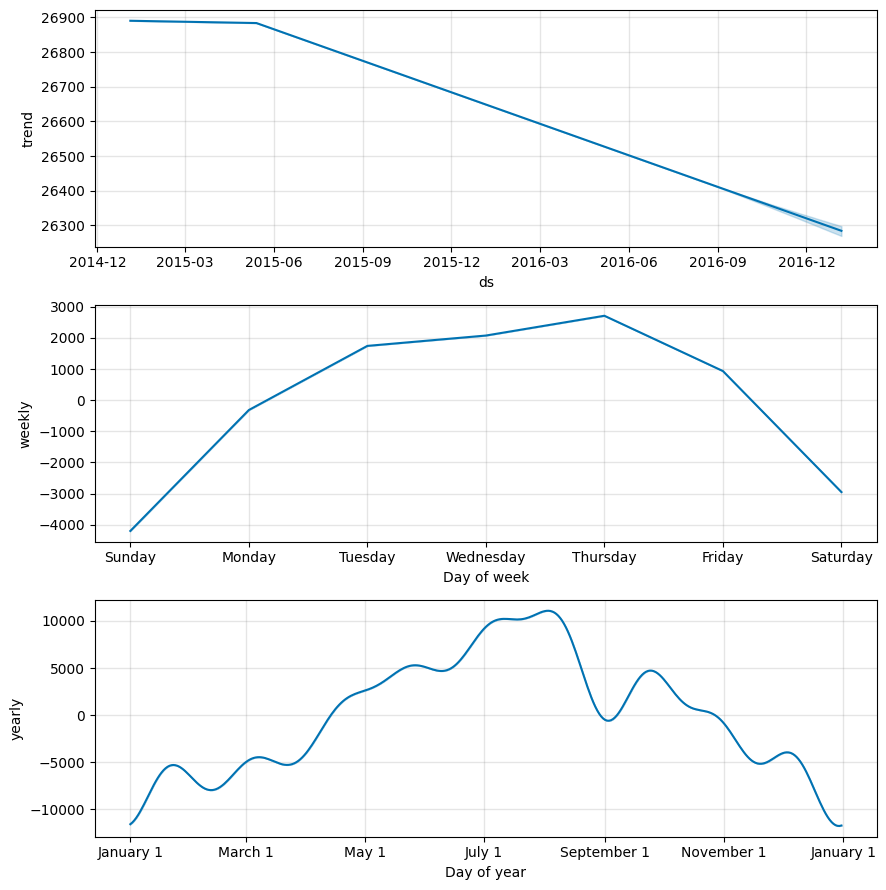

In [74]:
fgi2 = modelo.plot_components(previsao)

In [75]:
df_previsao = previsao[['ds', 'yhat']]

df_comparacao = pd.merge(df_previsao, df_test, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [76]:
mse= mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38623883.499975376, RMSE:6214.8116222437


Inclusive, conseguimos um RMSE com valor bem mais baixo. Antes estava na casa dos 21 mil e agora caiu para em torno de 6 mil. Houve uma melhora considerável.

Contudo, surge a seguinte questão: será que conseguimos melhorar ainda mais esse modelo e diminuir o erro que ele apresenta? Se olharmos para o gráfico que temos, podemos visualizar vários pontos distantes da tendência (os outliers, dados discrepantes), tanto abaixo do intervalo de confiança inferior, quanto acima do intervalo de confiança superior.

Será que não podemos remover esses dados e ver se, com isso, a previsão fica mais interessante?

    É preciso saber que nem sempre é ideal fazer essa remoção. Depende muito do tipo de dado com o qual estamos trabalhando e do nosso objetivo.

    Por exemplo, em alguns casos, podemos ter uma série temporal que tenha por objetivo detectar anomalias, que são valores atípicos. Nesse caso, não faria sentido remover os outliers.

    Mas com os dados que temos atualmente, podemos testar essa estratégia e ver o que acontece.

Vamos remover os valores que estão fora do intervalo de confiança, representada pela faixa azul. Existem outras maneiras de fazer essa remoção, mas vamos testar desse jeito e ver o que acontece.
Removendo os outliers

Para fazer esse tratamento, vamos descer para o final do notebook. Na próxima célula vazia, vamos chamar novamente o df_prophet, o DataFrame inicial que fizemos no começo, antes de separar os dados em treino e teste.

###Removendo outliers


In [77]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [78]:
np.random.seed(4587)
modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/ztto4hro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/h6o736rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63095', 'data', 'file=/tmp/tmpq108pm_a/ztto4hro.json', 'init=/tmp/tmpq108pm_a/h6o736rg.json', 'output', 'file=/tmp/tmpq108pm_a/prophet_modelx6ihk7_l/prophet_model-20250110150606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Descendo mais uma linha, vamos criar aquele dataframe do futuro. O futuro vai ser igual ao modelo.make_future_dataframe(). Entre os parênteses, vamos colocar periods=0.

Esse período será igual a zero porque a ideia não é fazer uma previsão, mas simplesmente obter o resultado da previsão para filtrar os dados posteriormente.

Por fim, na próxima linha, vamos criar a previsão com previsao que vai ser igual ao modelo. Vamos chamar a função predict() e passar o futuro entre seus parênteses.

In [79]:
sem_outliers = df_prophet[
    (df_prophet['y'] > previsao['yhat_lower']) &
    (df_prophet['y'] < previsao['yhat_upper'])
]

In [80]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [81]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'].iloc[:505]
df_treino['y'] = sem_outliers['y'].iloc[:505]

In [82]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'].iloc[505:]
df_teste['y'] = sem_outliers['y'].iloc[505:]

In [83]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/167nn82b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq108pm_a/3d962bnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57457', 'data', 'file=/tmp/tmpq108pm_a/167nn82b.json', 'init=/tmp/tmpq108pm_a/3d962bnx.json', 'output', 'file=/tmp/tmpq108pm_a/prophet_modeljn99okj2/prophet_model-20250110153402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


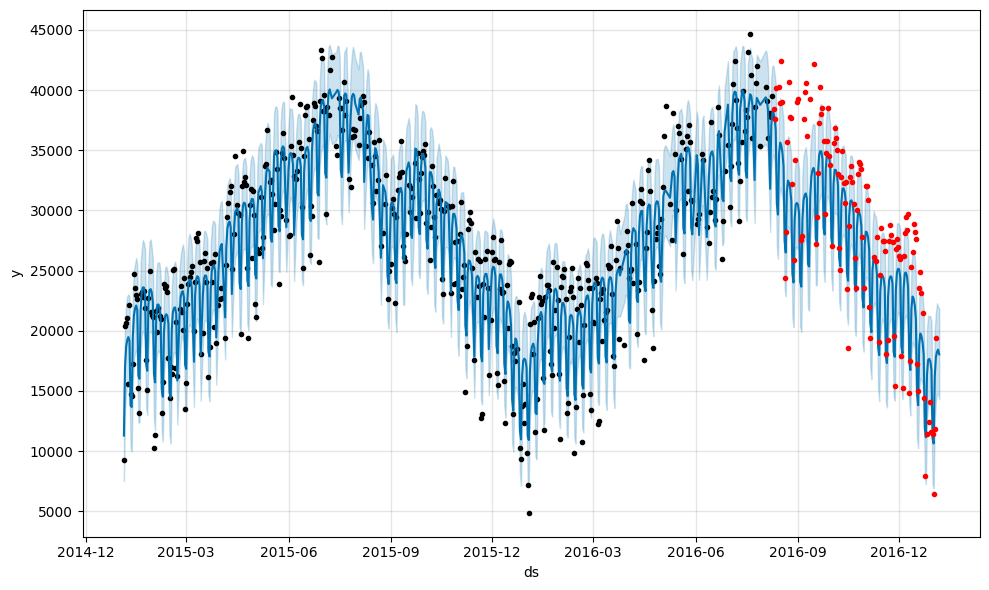

In [84]:
fig_1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')


In [85]:
df_previsao = previsao[['ds', 'yhat']]

df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [86]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}') #RMSE é o erro

MSE:15672925.764235971, RMSE:3958.904616713564
